In [61]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import cv2

In [95]:
import math
def normpdf(x, mean, sd):
    var = sd**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(x-mean)**2/(2*var))
    return num/denom

In [96]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

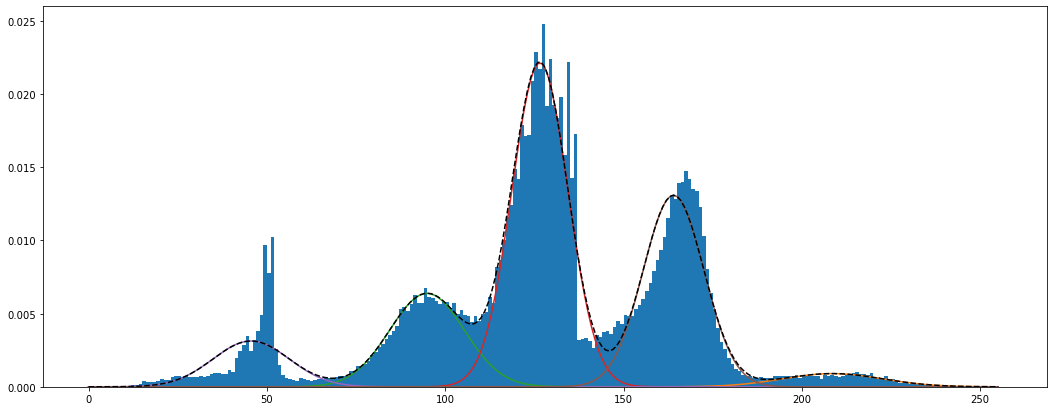

In [108]:
nm=5
It=np.ravel(I)
It=np.reshape(It,(len(It),1))
classif = GaussianMixture(n_components=nm)
classif.fit(It)
w=classif.weights_
m=classif.means_
v=classif.covariances_
nx=np.zeros((256,nm))
x=np.arange(0,256,1)
for model in range(nm):
    for i in range(256):
        nx[i,model]=normpdf(i,m[model],np.sqrt(v[model]))
    nx[:,model]=w[model]*nx[:,model]
nt=np.sum(nx,axis=1)
fig1=plt.figure(figsize = (18,7))
plt.hist(I.ravel(),256,[0,256],density=True)
plt.plot(x,nx)
plt.plot(x,nt,'k--')
# plt.axvline(x=230,color='r')
plt.show()



In [13]:
np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)


img = mask + 0.3*np.random.randn(*mask.shape)

print(img.shape)

(256, 256)


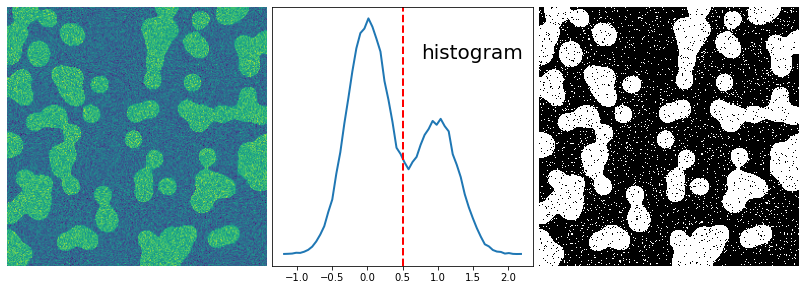

In [1]:
hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

classif = GaussianMixture(n_components=2)
classif.fit(img.reshape((img.size, 1)))

threshold = np.mean(classif.means_)
binary_img = img > threshold


plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()